In [1]:
pip install numpy pandas opencv-python scikit-learn imbalanced-learn matplotlib seaborn scikit-image torchvision

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
from skimage.filters import sobel
from skimage.filters.rank import entropy

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Ganti path ke direktori dataset-mu
DATASET_DIR = "D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\CITRA_DIGITAL\TUBES\KODE_Train\dataset-resized"

images = []
labels = []

# Loop tiap folder kelas
for class_name in os.listdir(DATASET_DIR):
    class_path = os.path.join(DATASET_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"Memuat gambar dari kelas: {class_name}")
    for filename in tqdm(os.listdir(class_path)):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(class_path, filename)
            img = cv2.imread(image_path)
            if img is not None:
                img = cv2.resize(img, (100, 100))  # ukuran tetap agar seragam
                images.append(img)
                labels.append(class_name)

# Konversi ke numpy array
images = np.array(images)
labels = np.array(labels)

print("Total gambar:", len(images))
print("Ukuran gambar:", images[0].shape)
print("Label unik:", np.unique(labels))


Memuat gambar dari kelas: cardboard


100%|██████████| 403/403 [00:00<00:00, 492.92it/s]


Memuat gambar dari kelas: glass


100%|██████████| 501/501 [00:00<00:00, 503.74it/s]


Memuat gambar dari kelas: metal


100%|██████████| 410/410 [00:00<00:00, 523.20it/s]


Memuat gambar dari kelas: paper


100%|██████████| 594/594 [00:01<00:00, 436.53it/s]


Memuat gambar dari kelas: plastic


 24%|██▍       | 116/482 [00:00<00:00, 510.35it/s]

Distribusi Kelas:
cardboard: 403
glass: 501
metal: 410
paper: 594
plastic: 482


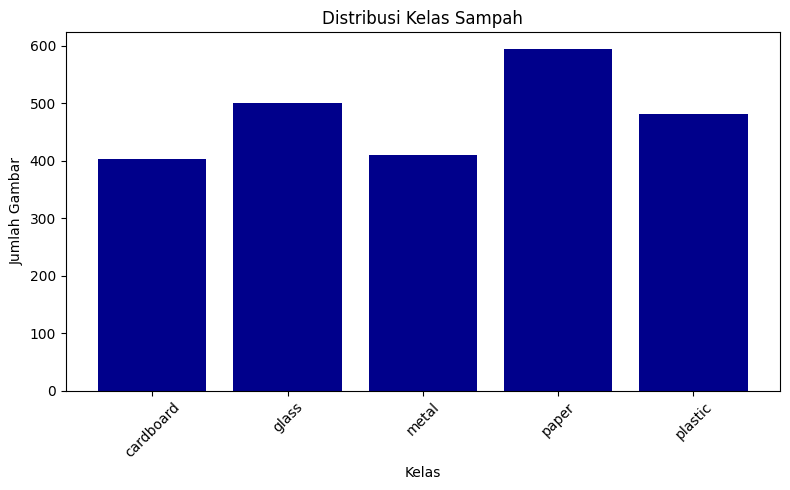

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# Misalnya label datamu tersimpan di variabel 'labels'
# Ganti ini sesuai nama variabel label di datamu
class_distribution = Counter(labels)

# Tampilkan distribusi di console
print("Distribusi Kelas:")
for label, count in class_distribution.items():
    print(f"{label}: {count}")

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 5))
plt.bar(class_distribution.keys(), class_distribution.values(), color='darkblue')
plt.title("Distribusi Kelas Sampah")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
import os
import shutil
import random
from tqdm import tqdm

# === Lokasi dataset awal dan tujuan
SOURCE_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\CITRA_DIGITAL\TUBES\KODE_Train\dataset-resized"
DEST_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\CITRA_DIGITAL\TUBES\KODE_Train\DATA_SPLIT_BARU"

# === Rasio split
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# === Buat folder tujuan
sets = ['train', 'valid', 'test']
classes = [d for d in os.listdir(SOURCE_DIR) if os.path.isdir(os.path.join(SOURCE_DIR, d))]

for set_type in sets:
    for class_name in classes:
        os.makedirs(os.path.join(DEST_DIR, set_type, class_name), exist_ok=True)

# === Mulai proses split
for class_name in tqdm(classes, desc="Membagi data"):
    class_path = os.path.join(SOURCE_DIR, class_name)
    all_images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(all_images)

    total = len(all_images)
    train_end = int(train_ratio * total)
    val_end = train_end + int(val_ratio * total)

    train_files = all_images[:train_end]
    val_files = all_images[train_end:val_end]
    test_files = all_images[val_end:]

    for f in train_files:
        shutil.copy2(os.path.join(class_path, f), os.path.join(DEST_DIR, 'train', class_name, f))
    for f in val_files:
        shutil.copy2(os.path.join(class_path, f), os.path.join(DEST_DIR, 'valid', class_name, f))
    for f in test_files:
        shutil.copy2(os.path.join(class_path, f), os.path.join(DEST_DIR, 'test', class_name, f))

print("[SELESAI] Dataset telah berhasil dipisah ke dalam folder train, valid, dan test.")

Membagi data: 100%|██████████| 5/5 [00:17<00:00,  3.49s/it]

[SELESAI] Dataset telah berhasil dipisah ke dalam folder train, valid, dan test.


In [2]:
import os
from collections import Counter

# Path ke folder data yang telah displit
BASE_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\CITRA_DIGITAL\TUBES\KODE_Train\DATA_SPLIT_BARU"

# Fungsi untuk menghitung jumlah gambar per kelas
def count_images_per_class(split_dir):
    class_counts = {}
    for class_name in os.listdir(split_dir):
        class_path = os.path.join(split_dir, class_name)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            class_counts[class_name] = count
    return class_counts

# Cek distribusi pada masing-masing set
for split in ['train', 'valid', 'test']:
    print(f"\n[INFO] Distribusi kelas di folder {split.upper()}:")
    split_path = os.path.join(BASE_DIR, split)
    counts = count_images_per_class(split_path)
    for class_name, count in counts.items():
        print(f"  - {class_name:<10}: {count} gambar")



[INFO] Distribusi kelas di folder TRAIN:
  - .DS_Store : 0 gambar
  - cardboard : 282 gambar
  - glass     : 350 gambar
  - metal     : 287 gambar
  - paper     : 415 gambar
  - plastic   : 337 gambar

[INFO] Distribusi kelas di folder VALID:
  - .DS_Store : 0 gambar
  - cardboard : 60 gambar
  - glass     : 75 gambar
  - metal     : 61 gambar
  - paper     : 89 gambar
  - plastic   : 72 gambar

[INFO] Distribusi kelas di folder TEST:
  - .DS_Store : 0 gambar
  - cardboard : 61 gambar
  - glass     : 76 gambar
  - metal     : 62 gambar
  - paper     : 90 gambar
  - plastic   : 73 gambar



[INFO] Distribusi kelas di folder TRAIN:
  - cardboard : 282 gambar
  - glass     : 350 gambar
  - metal     : 287 gambar
  - paper     : 415 gambar
  - plastic   : 337 gambar


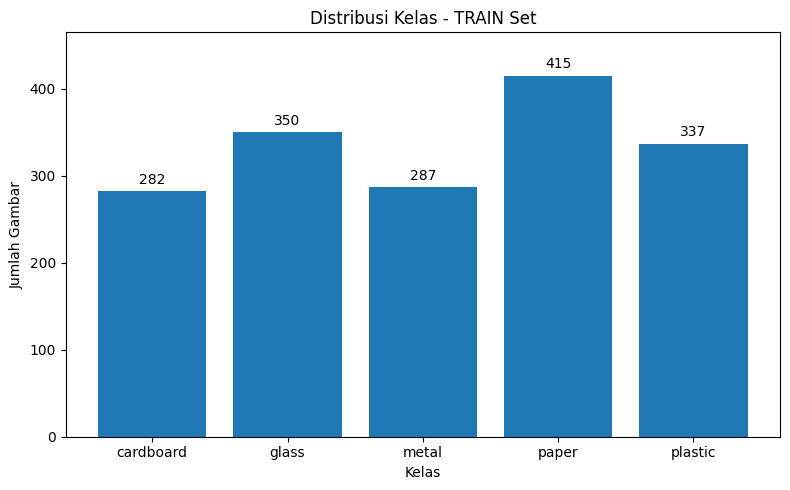


[INFO] Distribusi kelas di folder VALID:
  - cardboard : 60 gambar
  - glass     : 75 gambar
  - metal     : 61 gambar
  - paper     : 89 gambar
  - plastic   : 72 gambar


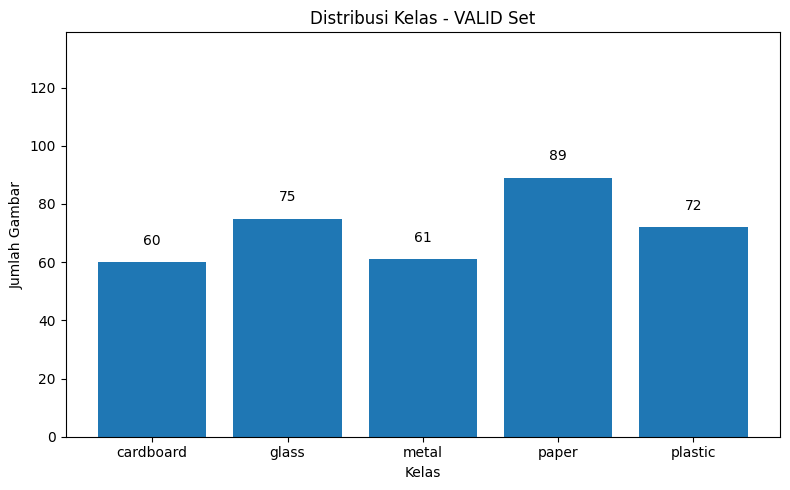


[INFO] Distribusi kelas di folder TEST:
  - cardboard : 61 gambar
  - glass     : 76 gambar
  - metal     : 62 gambar
  - paper     : 90 gambar
  - plastic   : 73 gambar


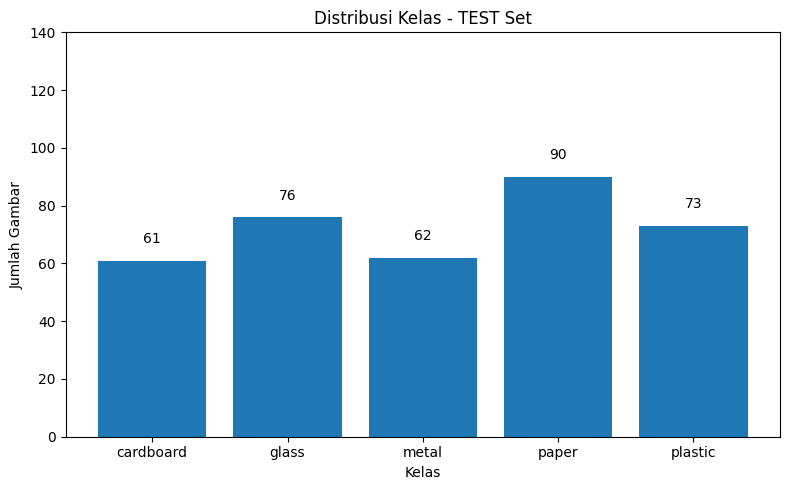

In [4]:
import os
import matplotlib.pyplot as plt

# Path ke folder hasil split
BASE_DIR = r"D:\KULIAH\TELKOM_UNIVERSITY\SEMESTER_8\CITRA_DIGITAL\TUBES\KODE_Train\DATA_SPLIT_BARU"

# Fungsi untuk menghitung jumlah gambar per kelas
def count_images_per_class(split_dir):
    class_counts = {}
    for class_name in os.listdir(split_dir):
        class_path = os.path.join(split_dir, class_name)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            class_counts[class_name] = count
    return class_counts

# Visualisasi distribusi kelas
def plot_distribution(counts, title):
    classes = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(8, 5))
    bars = plt.bar(classes, values)
    plt.title(title)
    plt.xlabel("Kelas")
    plt.ylabel("Jumlah Gambar")
    plt.ylim(0, max(values) + 50)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Proses untuk train, valid, test
for split in ['train', 'valid', 'test']:
    print(f"\n[INFO] Distribusi kelas di folder {split.upper()}:")
    split_path = os.path.join(BASE_DIR, split)
    counts = count_images_per_class(split_path)
    
    # Print ke terminal
    for class_name, count in counts.items():
        print(f"  - {class_name:<10}: {count} gambar")
    
    # Tampilkan grafik
    plot_distribution(counts, f"Distribusi Kelas - {split.upper()} Set")
